In [22]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

In [23]:
torch.cuda.set_device(1)

## Data

In [24]:
path = untar_data(URLs.MNIST)
path.ls()

[PosixPath('/home/deep/.fastai/data/mnist_png/testing'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training')]

In [42]:
il = ImageList.from_folder(path, convert_mode='L')

In [43]:
il.items[0]

PosixPath('/home/deep/.fastai/data/mnist_png/testing/2/995.png')

In [44]:
defaults.cmap='binary'

In [45]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/deep/.fastai/data/mnist_png

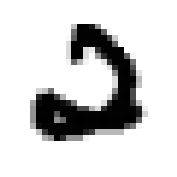

In [46]:
il[0].show()

In [47]:
sd = il.split_by_folder(train='training',valid='testing')

In [48]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/deep/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/deep/.fastai/data/mnist_png;

Test: None

In [49]:
(path/'training').ls()

[PosixPath('/home/deep/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/1')]

In [50]:
(path/'training').ls()

[PosixPath('/home/deep/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/deep/.fastai/data/mnist_png/training/1')]

In [51]:
ll = sd.label_from_folder()

In [52]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
2,2,2,2,2
Path: /home/deep/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
2,2,2,2,2
Path: /home/deep/.fastai/data/mnist_png;

Test: None

In [53]:
x, y = ll.train[0] #inputs x and labels y

2 torch.Size([1, 28, 28])


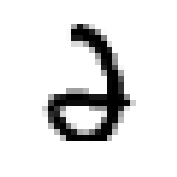

In [55]:
x.show()
print(y,x.shape)

In [56]:
tfms = ([*rand_pad(padding=3,size=28,mode='zeros')],[])

In [57]:
ll=ll.transform(tfms)

In [58]:
bs=256

In [59]:
data=ll.databunch(bs=bs).normalize()

In [60]:
x,y = data.train_ds[0]

2


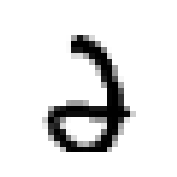

In [61]:
x.show()
print(y)

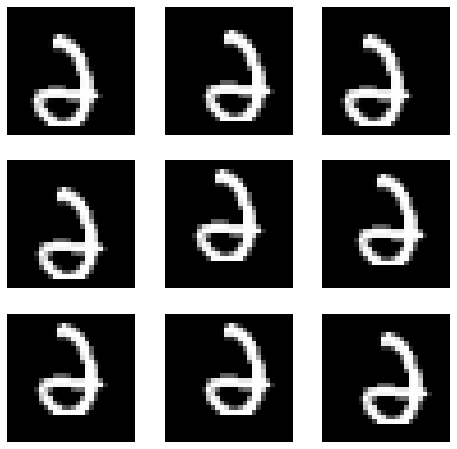

In [62]:
def _plot(i,j,ax): 
    data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [64]:
xb,yb=data.one_batch()
xb.shape,yb.shape

(torch.Size([256, 1, 28, 28]), torch.Size([256]))

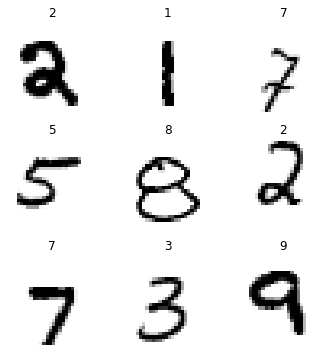

In [66]:
data.show_batch(rows=3,figsize=(5,5))

## Basic CNN with batchnorm

In [68]:
def conv(ni,nf):
    return nn.Conv2d(ni,nf, kernel_size=3,stride=2,padding=1)

In [69]:
model = nn.Sequential(
    conv(1,8), #14 (28,28)/2 --> due to the stride
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8,16), #7 
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16,32), #4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32,16), #2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16,10), #1
    nn.BatchNorm2d(10),
    Flatten() #remove (1,1) grid
)

In [70]:
learn = Learner(data,model,loss_func=nn.CrossEntropyLoss(),metrics=accuracy)

In [71]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [72]:
xb = xb.cuda()

In [73]:
model(xb).shape

torch.Size([256, 10])

In [ ]:
learn.lr_find()

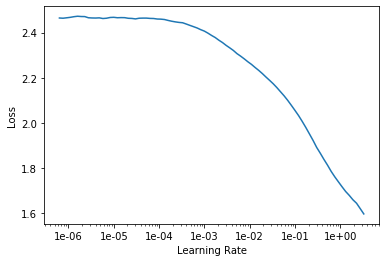

In [77]:
learn.recorder.plot()

In [78]:
learn.fit_one_cycle(3,max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.239165,0.154673,0.949800,00:04
1,0.119154,0.106242,0.966000,00:04
2,0.068299,0.038789,0.987600,00:05


## Refactor

In [79]:
def conv2(ni,nf):
    return conv_layer(ni,nf,stride=2) 

In [80]:
model = nn.Sequential(
    conv2(1,8),
    conv2(8,16),
    conv2(16,32),
    conv2(32,16),
    conv2(16,10),
    Flatten()
) #Exactly the same NN

In [82]:
learn = Learner(data,model,loss_func = nn.CrossEntropyLoss(),metrics=accuracy)

In [83]:
learn.fit_one_cycle(10,max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.353899,0.209783,0.941700,00:04
1,0.176939,0.266380,0.919400,00:04
2,0.141460,0.131157,0.955100,00:04
3,0.122442,0.082709,0.973400,00:05
4,0.103047,0.109995,0.964600,00:05
5,0.090482,0.054578,0.984100,00:05
6,0.075359,0.048715,0.985700,00:04
7,0.059490,0.043001,0.985900,00:04
8,0.047221,0.026081,0.991000,00:05
9,0.042694,0.024824,0.991100,00:05


## Resnet-ish

In [84]:
class ResBlock(nn.Module):
    def __init__(self,nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self,x):
        return x + self.conv2(self.conv1(x))

In [85]:
help(res_block)

Help on function res_block in module fastai.layers:

res_block(nf, dense:bool=False, norm_type:Union[fastai.layers.NormType, NoneType]=<NormType.Batch: 1>, bottle:bool=False, **conv_kwargs)
    Resnet block of `nf` features. `conv_kwargs` are passed to `conv_layer`.



In [86]:
model = nn.Sequential(
    conv2(1,8),
    res_block(8),
    conv2(8,16),
    res_block(16),
    conv2(16,32),
    res_block(32),
    conv2(32,16),
    res_block(16),
    conv2(16,10),
    Flatten()
) #Exactly the same NN

In [87]:
def conv_and_res(ni,nf):
    return nn.Sequential(conv2(ni,nf),res_block(nf))

In [89]:
model = nn.Sequential(
    conv_and_res(1,8),
    conv_and_res(8,16),
    conv_and_res(16,32),
    conv_and_res(32,16),
    conv2(16,10),
    Flatten()
)

In [90]:
learn = Learner(data,model,loss_func=nn.CrossEntropyLoss(),metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


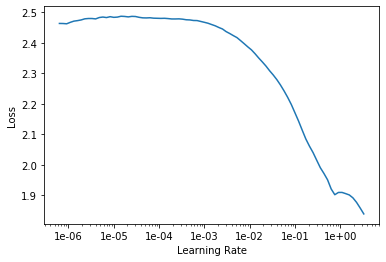

In [91]:
learn.lr_find()
learn.recorder.plot()

In [92]:
learn.fit_one_cycle(12,max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.313016,0.238300,0.935300,00:06
1,0.119544,0.098161,0.973700,00:06
2,0.100740,0.076714,0.975500,00:06
3,0.083096,0.059766,0.981800,00:06
4,0.069117,0.070666,0.977800,00:06
5,0.060733,0.047614,0.985200,00:06
6,0.052343,0.081922,0.974200,00:06
7,0.041985,0.050746,0.985300,00:05
8,0.036538,0.025211,0.991700,00:06
9,0.027906,0.020052,0.993400,00:05


In [93]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          72         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
___________________________________________________